In [1]:
from scipy.optimize import minimize 
import numpy as np
import pandas as pd
df=pd.read_csv("dataset B.csv")
x = df['X'].values
y = df['Y'].values
xSqr=x*x
xCube=x*x*x


In [2]:
def mse_lossSquare(params, xSqr,x, y): 
    a,b, c = params 
    y_hat = a* xSqr+b*x + c 
    mseSqr=(y-y_hat)*(y-y_hat)
    return np.mean(mseSqr)

def mse_lossCube(params, xCube,xSqr,x, y): 
    a,b,c,d = params 
    y_hat = a* xCube+b*xSqr + c*x+ d
    mseCube=(y-y_hat)*(y-y_hat)
    return np.mean(mseCube)

In [3]:
initial_guess = [0, 0, 0] 
result_mse = minimize(mse_lossSquare, initial_guess, args=(xSqr,x, y)) 
a_mseSqr, b_mseSqr, c_mseSqr = result_mse.x 

initial_guess = [0, 0, 0, 0] 
result_mse = minimize(mse_lossCube, initial_guess, args=(xCube,xSqr,x, y)) 
a_mseCube, b_mseCube, c_mseCube, d_mscCube = result_mse.x 



In [4]:
def analyze_lineSqr(x,y,a_mseSqr, b_mseSqr, c_mseSqr): 

    y_predSqr = a_mseSqr* xSqr+b_mseSqr*x + c_mseSqr 
    residuals = y - y_predSqr
    return residuals

def analyze_lineCube(x,y,a_mseCube, b_mseCube, c_mseCube, d_mscCube): 
    y_predCube = a_mseCube* xCube+b_mseCube*xSqr + c_mseCube*x+ d_mscCube
    residuals = y - y_predCube
    return residuals

1. Separating datapoints above and below the curve for power two

In [5]:
m=0
n=0
mr=np.ones(2000)
nr=np.ones(2000)
p=list(range(0,2000))
r=analyze_lineSqr(x,y,a_mseSqr, b_mseSqr, c_mseSqr)
print(r)
for i in p:
    if r[i]>0:
        m=m+1
        mr=r[i]
    if r[i]<0:
        n=n+1
        nr=r[i]

[ 2.20759356 -0.33319078  2.80975077 ... -3.6409757  -0.76520845
 -3.09201396]


1. Calculating mean of data points above the Best fit curve 

In [6]:
meanAboveResi=np.mean(mr)
meanAboveResi

np.float64(4.166052962496877)

1. Calculating mean of data points Below the Best fit curve 

In [7]:
meanBelowResi=np.mean(nr)
meanBelowResi

np.float64(-3.0920139630760985)

In [8]:
m=0
n=0
mr=np.ones(2000)
nr=np.ones(2000)
p=list(range(0,2000))
r=analyze_lineCube(x,y,a_mseCube, b_mseCube, c_mseCube, d_mscCube)
print(r)
for i in p:
    if r[i]>0:
        m=m+1
        mr[i]=r[i]
    if r[i]<0:
        n=n+1
        nr[i]=r[i]

[ 2.18939907 -0.35127604  2.79177446 ... -3.62299949 -0.74712329
 -3.07381958]


In [9]:
meanAboveResi=np.mean(mr)
meanAboveResi

np.float64(2.069927733687656)

In [10]:
meanBelowResi=np.mean(nr)
meanBelowResi

np.float64(-1.0699277133486682)

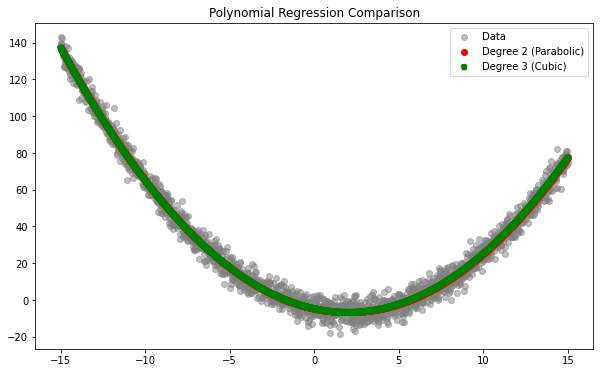

-1.3497618909626792e-05
0.49843586223775516
0.4984358616749043


In [11]:
import matplotlib.pyplot as plt
x_range = np.linspace(df['X'].min(), df['X'].max(), 2000)
y_predSqr1 = a_mseSqr* xSqr+b_mseSqr*x + c_mseSqr 
y_predCube1 = a_mseCube* xCube+b_mseCube*xSqr + c_mseCube*x+ d_mscCube
plt.figure(figsize=(10,6)) 
plt.scatter(df['X'], df['Y'], color='gray', alpha=0.5, label='Data') 
plt.scatter(x_range, y_predSqr1, color='red', label='Degree 2 (Parabolic)') 
plt.scatter(x_range, y_predCube1, color='green', label='Degree 3 (Cubic)', linestyle='--') 
plt.legend() 
plt.title("Polynomial Regression Comparison") 
plt.show() 
print(a_mseCube)
print(b_mseCube)
print(a_mseSqr)
